# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
print(cv2.__version__)

4.6.0


In [2]:
!pip install opencv-python==4.4.0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.4.0


## Etapa 2 - Conectando com o Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [3]:
path = '/content/gdrive/MyDrive/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [5]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(LABELS)

80

In [7]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [8]:
net = cv2.dnn.readNet(config_path, weights_path)

In [9]:
net

<dnn_Net 0x7f7ce18ac5f0>

## Etapa 4 - Definindo mais configurações para a detecção 

In [10]:
np.random.seed(22)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[206 203 114]
 [250 150 220]
 [ 76 165 218]
 [ 90 160 102]
 [ 33 152 189]
 [ 81  35  79]
 [  2 189  77]
 [194 169 144]
 [242 230  60]
 [ 32 152 199]
 [ 40 176  92]
 [128 152 126]
 [ 77  45  94]
 [194 179  49]
 [204 211  56]
 [ 58  53 107]
 [226  99 174]
 [161 144 181]
 [ 23 210 138]
 [146 223 244]
 [131  89 101]
 [225  27  15]
 [184  54 152]
 [204 198 229]
 [112 123 104]
 [185 221  10]
 [122  43 218]
 [154 181 234]
 [ 31  67   3]
 [151 190   1]
 [127  99 248]
 [210 195 221]
 [127 161 173]
 [146  72 171]
 [181 131 186]
 [179  27 193]
 [215   9 154]
 [155  56 189]
 [120 102 106]
 [ 26 163 126]
 [160 107  57]
 [ 57 173 186]
 [103  71 189]
 [ 72 172  77]
 [ 69 195 175]
 [ 47 231   4]
 [  5  49 152]
 [ 90 201 187]
 [ 91 102  29]
 [179 176 179]
 [209 241  81]
 [135 229  38]
 [ 14 227 171]
 [107 237  37]
 [ 93  41  76]
 [ 19 212 245]
 [221 105 224]
 [100  96   5]
 [ 34 235 134]
 [  3   3 139]
 [ 90 200 134]
 [124  11   7]
 [187 204 223]
 [242  78 234]
 [213  94  76]
 [ 71 169 101]
 [ 57 252 

In [11]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [12]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[[327]
 [353]
 [379]]


In [17]:
!python --version


Python 3.8.10


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque a linha abaixo por: 
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

In [18]:
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [54]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

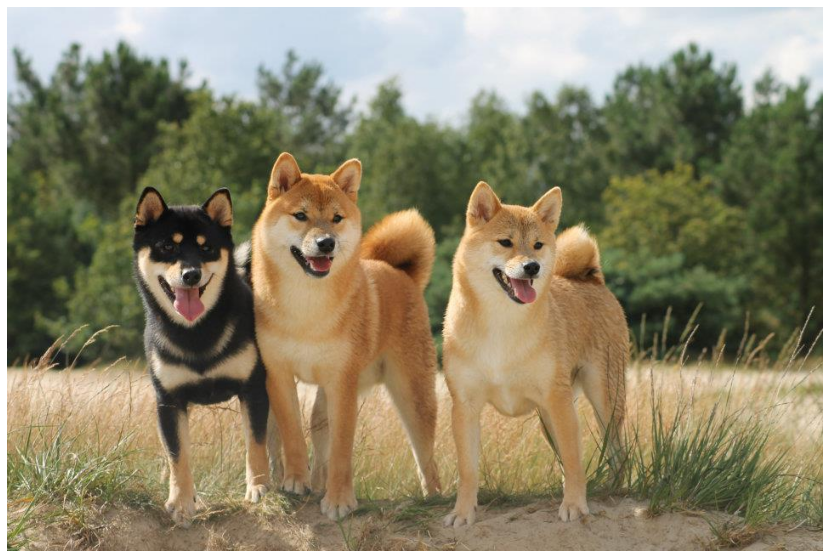

In [55]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO/imagens/cachorros.jpg')
mostrar(imagem)

In [22]:
type(imagem)

numpy.ndarray

In [23]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [24]:
imagem_cp = imagem.copy()

In [25]:
imagem.shape

(640, 960, 3)

In [26]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [27]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 2.53 segundos


## Etapa 7 - Definindo as variáveis

In [28]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = [] 
IDclasses = []

## Etapa 8 - Realizando a predição

In [29]:
len(layer_outputs)

3

In [30]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.0110055 , 0.01021747, 0.02264759, ..., 0.        , 0.        ,
         0.        ],
        [0.01492388, 0.01543289, 0.03303423, ..., 0.        , 0.        ,
         0.        ],
        [0.01701082, 0.01489798, 0.05110354, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.98426443, 0.03099855, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.985908  , 0.05975068, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 8112)

In [31]:
layer_outputs[1]

array([[0.03031933, 0.03208476, 0.10433296, ..., 0.        , 0.        ,
        0.        ],
       [0.03298577, 0.03253514, 0.13059245, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151366, 0.15157257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866273, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513652, ..., 0.        , 0.        ,
        0.        ],
       [0.96610314, 0.9677124 , 0.10772247, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [32]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.0640237 , 0.06951442, 0.15857814, ..., 0.        , 0.        ,
         0.        ],
        [0.06164717, 0.05672135, 0.31426722, ..., 0.        , 0.        ,
         0.        ],
        [0.03240779, 0.05009161, 0.7458891 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772264, ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.52080923, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023696e-02, 6.9514424e-02, 1.5857814e-01, 3.4840125e-01,
        4.2169032e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [33]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [34]:
LABELS[16]

'dog'

In [35]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [36]:
teste = np.array([0.10, 0.80, 0.10])

In [37]:
teste[1]

0.8

In [38]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.605953 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
classe mais provável: 16
confiança: 0.605953
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570455 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.   

In [39]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [40]:
print(confiancas), len(confiancas)

[0.6059529781341553, 0.9570454955101013, 0.88912433385849, 0.9090498089790344, 0.9525655508041382, 0.7894678115844727, 0.9860403537750244, 0.9869317412376404, 0.6623730659484863, 0.6959574222564697, 0.9729036688804626, 0.9767158627510071, 0.8875227570533752, 0.897688627243042, 0.9810121655464172, 0.9824252128601074]


(None, 16)

In [41]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [42]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [43]:
objs

array([[ 7],
       [15],
       [11]], dtype=int32)

In [44]:
print(objs.flatten())

[ 7 15 11]


In [45]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824252128601074, 0.9767158627510071)

In [46]:
confiancas[0]

0.6059529781341553

## Etapa 10 - Mostrando o resultado da detecção na imagem

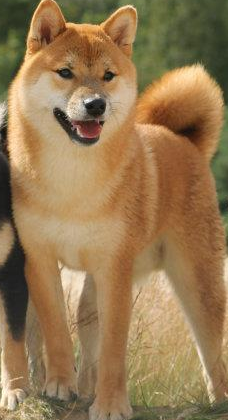

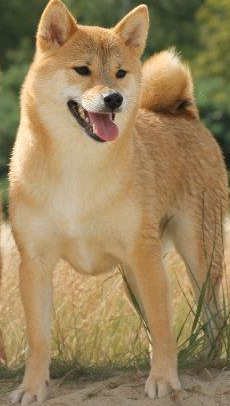

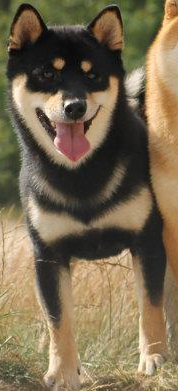

In [47]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

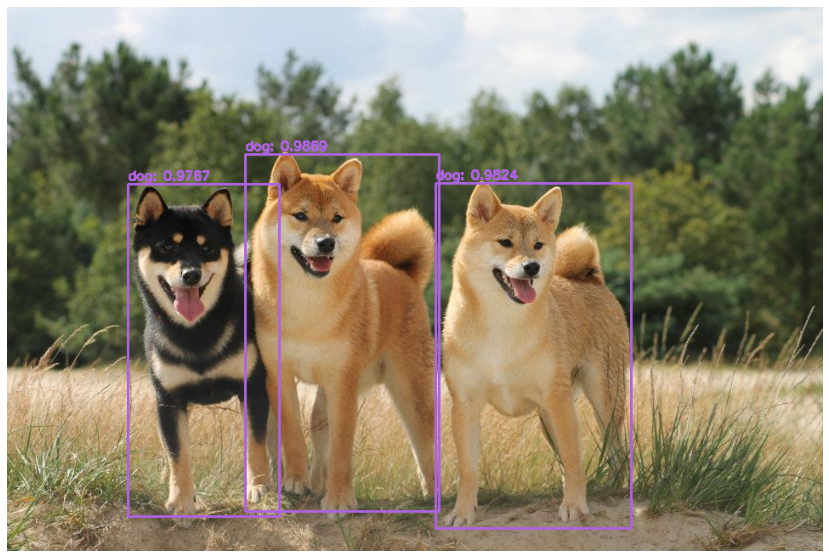

In [48]:
mostrar(imagem)

In [49]:
cv2.imwrite('resultado.jpg', imagem)

True

In [50]:
!cp ./resultado.jpg /content/gdrive/MyDrive/YOLO/imagens/resultado_cachorro.jpg